In [1]:
# importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from scipy import stats as st

In [2]:
# carregando os dados
data0 = pd.read_csv('/datasets/geo_data_0.csv')
data1 = pd.read_csv('/datasets/geo_data_1.csv')
data2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
# visualizando os dados
data0.sample(10)

,id,f0,f1,f2,product
55060,ZsaTd,0.224108,-0.230258,3.360397,109.123923
22003,NhnDA,0.606321,0.518622,0.467130,115.299146
76419,7QHcI,-0.916292,0.504768,2.968740,47.085293
62039,RRR4o,0.881724,0.623691,3.971084,147.200217
28000,YyOCl,0.285110,0.834810,-1.237105,61.997874
21610,6WFmP,0.839573,0.297005,-1.350335,63.641127
45257,FLv3A,-0.272373,1.028298,1.076160,77.181488
93032,8FrpP,1.310209,-0.373004,2.566429,146.388244
23664,D67VJ,-0.681437,0.653900,4.324087,153.124407
9789,Kz0nm,0.374620,0.980580,-4.911908,49.260756


In [4]:
# visualizando o perfil dos dados
data0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [5]:
# visualiando tipo de dados
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
# visualizando os dados
data1.sample(10)

,id,f0,f1,f2,product
98713,bnPBl,-13.095771,-3.989793,2.999668,84.038886
11608,ltxqx,-9.338891,-5.366082,1.999799,57.085625
17344,RmJnt,4.892973,-5.735206,3.996408,107.813044
56985,oHUg4,1.592092,-3.957737,3.994863,107.813044
44460,l50UV,7.704174,-3.618845,0.998205,26.953261
87766,1X6o2,6.494558,-9.272385,-0.006962,0.000000
28431,OuuXh,-7.402527,-6.073257,2.003982,57.085625
87627,dDdp3,0.269668,-7.779642,0.997263,26.953261
51488,ZVUdJ,-2.770199,-5.782044,2.003780,57.085625
97393,mECh5,-6.693929,-9.425214,3.989570,110.992147


In [7]:
# visualizando o perfil dos dados
data1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [8]:
# visualiando tipo de dados
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
# visualizando os dados
data2.sample(10)

,id,f0,f1,f2,product
97409,YC361,0.987883,-1.141422,2.001867,28.314416
62267,eidcj,0.176188,-2.114266,-3.756640,70.958948
26238,2gsQu,-0.736528,-0.232453,4.144697,40.182011
54446,rsSKN,2.306261,-1.753967,4.804002,113.061424
5981,pBWrt,-1.207290,-1.399623,2.250326,103.983573
60044,L71Up,0.447071,-2.747868,1.492316,72.224125
99715,JgckM,0.171557,-1.329390,1.940008,110.768606
35546,N1slQ,1.212770,-2.380475,-4.214727,45.474360
96127,sFNga,2.020882,-1.247203,4.827736,124.740785
99554,cEzja,-4.082195,1.855784,-2.871362,40.688515


In [10]:
# visualizando o perfil dos dados
data2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [11]:
# visualiando tipo de dados
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
# checando valores vazios
nan_columns0 = data0.columns[data0.isnull().any()].tolist()
nan_columns1 = data1.columns[data1.isnull().any()].tolist()
nan_columns2 = data2.columns[data2.isnull().any()].tolist()
print("NaN columns data0: ",nan_columns0)
print("NaN columns data1: ",nan_columns1)
print("NaN columns data2: ",nan_columns2)

NaN columns data0:  []
NaN columns data1:  []
NaN columns data2:  []


In [13]:
# checando valores duplicados explícitos

print("duplicados no data0",data0.duplicated().sum())
print("duplicados no data1",data1.duplicated().sum())
print("duplicados no data2",data2.duplicated().sum())

duplicados no data0 0
duplicados no data1 0
duplicados no data2 0


Conclusions:
- All three dataframes have exactly the same structure in terms of columns, column names, and data types.
- No missing or duplicate values were identified in any of the dataframes.
- We will need to scale the features as they have very different scales between f0, f1, and f2.
- Initially, no further adjustments are needed for the data, and we can proceed with the analysis.

In [14]:
# Preparando dados para modelo de regressão linear em geo_data_0.csv

target = data0["product"]
features = data0.drop(["product","id"],axis=1)

# criando conjunto de treinamento e validação
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

# escalando as características
numeric = ['f0','f1','f2']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])


# instanciando o modelo
model = LinearRegression()

# treinando o modelo
model.fit(features_train,target_train)

# calculando previsões conjunto de validação
predicted_valid = model.predict(features_valid)

# calculando mse
mse = mean_squared_error(target_valid, predicted_valid, squared=False)

# calculando r2
r2 = r2_score(target_valid,predicted_valid)

# calculando mae
mae = mean_absolute_error(target_valid,predicted_valid)

# calculando volume médio previso
vmp = predicted_valid.mean()

# imprimindo resultados
print('Regressão Linear')
print(f'REQM = {mse:.2f}')
print(f'R2 = {r2:.2f}')
print(f'MAE = {mae:.2f}')
print(f'Volume Médio Previsto = {vmp:.2f}')

Regressão Linear
REQM = 37.58
R2 = 0.28
MAE = 30.92
Volume Médio Previsto = 92.59


/tmp/ipykernel_62/2002691911.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

In [15]:
# transformando passos anteriores em uma função

def analyze_data(df):

    target = df["product"]
    features = df.drop(["product","id"],axis=1)

    # criando conjunto de treinamento e validação
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345
    )

    # escalando as características
    numeric = ['f0','f1','f2']

    scaler = StandardScaler()
    scaler.fit(features_train[numeric])

    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])


    # instanciando o modelo
    model = LinearRegression()

    # treinando o modelo
    model.fit(features_train,target_train)

    # calculando previsões conjunto de validação
    predicted_valid = model.predict(features_valid)

    # calculando mse
    mse = mean_squared_error(target_valid, predicted_valid, squared=False)

    # calculando r2
    r2 = r2_score(target_valid,predicted_valid)

    # calculando mae
    mae = mean_absolute_error(target_valid,predicted_valid)

    # calculando volume médio previso
    vmp = predicted_valid.mean()

    # imprimindo resultados
    print('Regressão Linear')
    print(f'REQM = {mse:.2f}')
    print(f'R2 = {r2:.2f}')
    print(f'MAE = {mae:.2f}')
    print(f'Volume Médio Previsto = {vmp:.2f}')
    
    return pd.Series(predicted_valid),target_valid.reset_index(drop=True)

In [16]:
# rodando a função para geo_data_0

predicted_valid0, target_valid0 = analyze_data(data0)

Regressão Linear
REQM = 37.58
R2 = 0.28
MAE = 30.92
Volume Médio Previsto = 92.59


/tmp/ipykernel_62/3058925487.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

Conclusion: Dataset geo_data_0 has an average expected volume of 92,59, RMSE of 37,58, MAE of 30,92 and R2 of 0,28

In [17]:
# rodando a função para geo_data_1

predicted_valid1, target_valid1 = analyze_data(data1)

Regressão Linear
REQM = 0.89
R2 = 1.00
MAE = 0.72
Volume Médio Previsto = 68.73


/tmp/ipykernel_62/3058925487.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

Conclusion: Dataset geo_data_1 has an average expected volume of 68,73, RMSE of 0,89, MAE of 0,72 and R2 of 1,00. 

In [18]:
# rodando a função para geo_data_2

predicted_valid2, target_valid2 = analyze_data(data2)

/tmp/ipykernel_62/3058925487.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

Regressão Linear
REQM = 40.03
R2 = 0.21
MAE = 32.79
Volume Médio Previsto = 94.97


Conclusions:
- In the geo_data_2 dataset, we have a predicted average volume of 94.97, an RMSE of 40.03, an MAE of 32.79, and an R² of 0.21.
- The dataset with the highest average volume is geo_data_2 (95), but it also has the highest RMSE (40).
- geo_data_1 has a lower average volume (approximately 69) but very low dispersion (RMSE of 0.89).
- geo_data_0 has a high average volume (93), but also a high RMSE (37.58).

In [19]:
# calculando intervalo de confiança para geo_data_0
sample0 = pd.Series(data0["product"])
confidence_interval0 = st.t.interval(.95, len(sample0)-1,loc=sample0.mean(),scale=sample0.sem())
print("geo_data_0")
print("Média:",sample0.mean())
print("intervalo de confiança 95%:", confidence_interval0)

geo_data_0
Média: 92.50000000000001
intervalo de confiança 95%: (92.22549756994802, 92.77450243005201)


In [20]:
# calculando intervalo de confiança para geo_data_1
sample1 = pd.Series(data1["product"])
confidence_interval1 = st.t.interval(.95, len(sample1)-1,loc=sample1.mean(),scale=sample1.sem())
print("geo_data_1")
print("Média:",sample1.mean())
print("intervalo de confiança 95%:", confidence_interval1)

geo_data_1
Média: 68.82500000000002
intervalo de confiança 95%: (68.54023530255081, 69.10976469744922)


In [21]:
# calculando intervalo de confiança para geo_data_2
sample2 = pd.Series(data2["product"])
confidence_interval2 = st.t.interval(.95, len(sample2)-1,loc=sample2.mean(),scale=sample2.sem())
print("geo_data_2")
print("Média:",sample2.mean())
print("intervalo de confiança 95%:", confidence_interval2)

geo_data_2
Média: 95.00000000000004
intervalo de confiança 95%: (94.72263885514018, 95.27736114485991)


In [22]:
# preparando para o cálculo do lucro

# armazenando valores das variáveis para cálculo do lucro
well_cost = 500000
investment = 100000000
revenue_per_unit = 4500
wells = investment // well_cost

In [23]:
minimum_reserve_threshold = investment / revenue_per_unit
print(minimum_reserve_threshold)

22222.222222222223


Conclusion: To be viable, the minumum oil reserve of 200 wells should be 22.222,22

In [24]:
# Comparação do break-even da quantidade mínima por poço com o volume médio de cada região.

data0_above = data0[data0["product"] >= 111.1].value_counts()
data1_above = data1[data1["product"] >= 111.1].value_counts()
data2_above = data2[data2["product"] >= 111.1].value_counts()

print("Poços com volume acima de 111.1 em geo_data_0: ", len(data0_above))
print("Poços com volume acima de 111.1 em geo_data_1: ", len(data1_above))
print("Poços com volume acima de 111.1 em geo_data_2: ", len(data2_above))

Poços com volume acima de 111.1 em geo_data_0:  36594
Poços com volume acima de 111.1 em geo_data_1:  16537
Poços com volume acima de 111.1 em geo_data_2:  38186


Conclusions:
- Of the three regions, geo_data_2 has the highest number of wells with a volume above the break-even point of 111.1 (38,186), followed by geo_data_0 (36,594).
- Considering the average volume of the regions, none of them has an average volume exceeding 111.1. The closest is geo_data_2 with 95.
- To calculate profit, we will need to select the top 200 wells, multiply their predicted volumes by the unit revenue, and subtract the drilling costs. Finally, sum the individual results to obtain the total profit.

In [25]:
# formula do lucro conforme código do revisor, alterada para receber objeto series ao inves de data frame

def calculate_profit2(series):
    best_wells = series.sort_values(ascending=False).head(200)
    total_volume = best_wells.sum()
    potential_profit = (total_volume * revenue_per_unit) - investment
    return potential_profit

In [26]:
# fórmula para cálculo do bootstrap conforme código do revisor, incluindo random_state

state = np.random.RandomState(12345)
def calculate_bootstrap2(
    data,
    revenue_per_barrel = revenue_per_unit,
    investment = investment,
    total_samples=1000,
    sample_size=500
):
    profits = []
    for _ in range(total_samples):
        sampled_data = data.sample(n=sample_size,replace=True,random_state=state)
        profit = calculate_profit2(sampled_data)
        profits.append(profit)
    return pd.Series(profits)

Probabilidade Lucro Negativo: 0.10%
Lucro Médio Esperado: 3575961.28
Intervalo de confiança: (1354639.6327668515, 5655461.438525173)


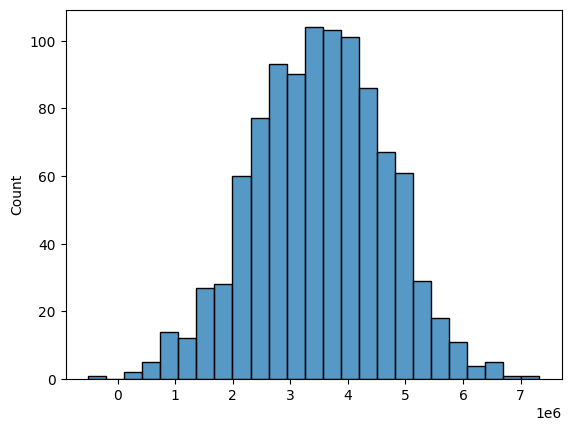

In [34]:
# bootstrapping revisado conforme código do revisor - geo_data_0

import seaborn as sns

bsdata0 = calculate_bootstrap2(predicted_valid0)

avg_profit = np.mean(bsdata0)
profit_conf_interval = (np.quantile(bsdata0,q=0.025),np.quantile(bsdata0,q=0.975))
prob_neg_profit = (np.array(bsdata0) <0).mean()

sns.histplot(calculate_bootstrap2(predicted_valid0))
print(f"Probabilidade Lucro Negativo: {prob_neg_profit:.2%}")
print(f"Lucro Médio Esperado: {avg_profit:.2f}")
print(f"Intervalo de confiança: {profit_conf_interval}")

Probabilidade Lucro Negativo: 1.40%
Lucro Médio Esperado: 4429538.17
Intervalo de confiança: (507396.077909229, 8271247.506828291)


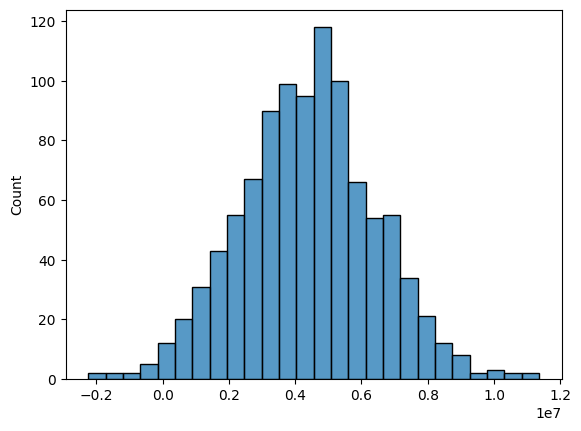

In [35]:
# bootstrapping revisado conforme código do revisor - geo_data_1

bsdata1 = calculate_bootstrap2(predicted_valid1)

avg_profit = np.mean(bsdata1)
profit_conf_interval = (np.quantile(bsdata1,q=0.025),np.quantile(bsdata1,q=0.975))
prob_neg_profit = (np.array(bsdata1) <0).mean()

sns.histplot(calculate_bootstrap2(predicted_valid1))
print(f"Probabilidade Lucro Negativo: {prob_neg_profit:.2%}")
print(f"Lucro Médio Esperado: {avg_profit:.2f}")
print(f"Intervalo de confiança: {profit_conf_interval}")

Probabilidade Lucro Negativo: 0.20%
Lucro Médio Esperado: 2744993.39
Intervalo de confiança: (971048.8949257996, 4717303.194222021)


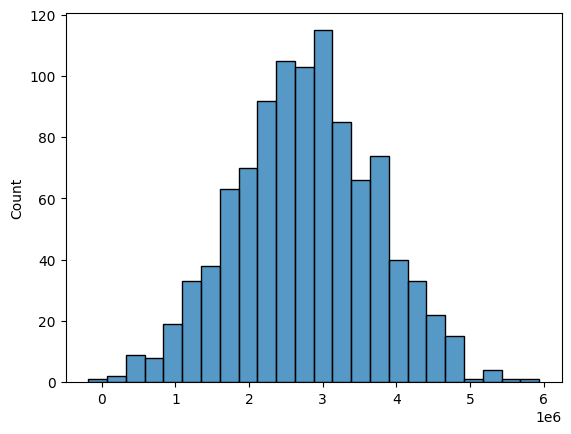

In [36]:
# bootstrapping revisado conforme código do revisor - geo_data_2

bsdata2 = calculate_bootstrap2(predicted_valid2)

avg_profit = np.mean(bsdata2)
profit_conf_interval = (np.quantile(bsdata2,q=0.025),np.quantile(bsdata2,q=0.975))
prob_neg_profit = (np.array(bsdata2) <0).mean()

sns.histplot(calculate_bootstrap2(predicted_valid2))
print(f"Probabilidade Lucro Negativo: {prob_neg_profit:.2%}")
print(f"Lucro Médio Esperado: {avg_profit:.2f}")
print(f"Intervalo de confiança: {profit_conf_interval}")

Conclusion - Based on the bootstrapping analysis, Region 1 would be the best choice as it has the highest profit. Although Region 1 has the highest risk of loss, it is still below 2.5%, and its confidence interval contains positive values on both ends. This contradicts the earlier conclusion that suggested Region 0 as the best option, which was based solely on the expected average profit.

In [28]:
# criando uma função para calcular o lucro baseado no custo de um poço e na receita do poço (antiga)

def calculate_profit(target_valid, predicted_valid):
    # classificando as predições em ordem decrescente
    sorted_preds = predicted_valid.sort_values(ascending=False)
    
    # selectionando os primeiros 200 postos das predições
    selected = target_valid.loc[sorted_preds.index][:wells]
    
    # calculando lucro
    revenue = selected.sum() * revenue_per_unit
    cost = investment
    profit = revenue - cost
    return profit

In [29]:
# calculando lucro para as 3 regiões (antiga)

print(f"Profit region 0: {calculate_profit(target_valid0,predicted_valid0):.2f}")
print(f"Profit region 1: {calculate_profit(target_valid1,predicted_valid1):.2f}")
print(f"Profit region 2: {calculate_profit(target_valid2,predicted_valid2):.2f}")

Profit region 0: 33208260.43
Profit region 1: 24150866.97
Profit region 2: 27103499.64


Conclusion: Based on the expected profit from the predictions, Region 0 would be the chosen region as it has the highest expected profit of $33,208,260.43.

Probabilidade Lucro Negativo: 6.00%
Lucro Médio Esperado: 4259385.27
Intervalo de confiança: (-1020900.9483793724, 9479763.533583675)


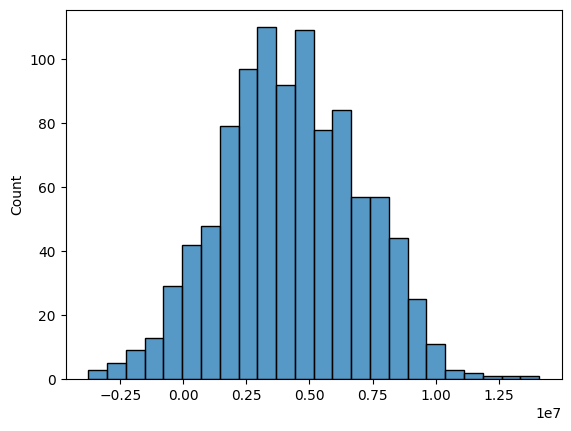

In [30]:
# Bootstrapping para geo_data_0 (antiga)

import seaborn as sns

state = np.random.RandomState(12345)

sample_size = 500
bootstrapping_size = 1000

btprofit = []
for i in range(bootstrapping_size):
    subsample = target_valid0.sample(n=sample_size,replace=True, random_state=state)
    sample_predicts = predicted_valid0.iloc[subsample.index]
    btprofit.append(calculate_profit(subsample,sample_predicts))
    
avg_profit = np.mean(btprofit)
profit_conf_interval = (np.quantile(btprofit,q=0.025),np.quantile(btprofit,q=0.975))
prob_neg_profit = (np.array(btprofit) <0).mean()

sns.histplot(btprofit)
print(f"Probabilidade Lucro Negativo: {prob_neg_profit:.2%}")
print(f"Lucro Médio Esperado: {avg_profit:.2f}")
print(f"Intervalo de confiança: {profit_conf_interval}")

Probabilidade Lucro Negativo: 0.30%
Lucro Médio Esperado: 5182594.94
Intervalo de confiança: (1281232.3143308456, 9536129.820669085)


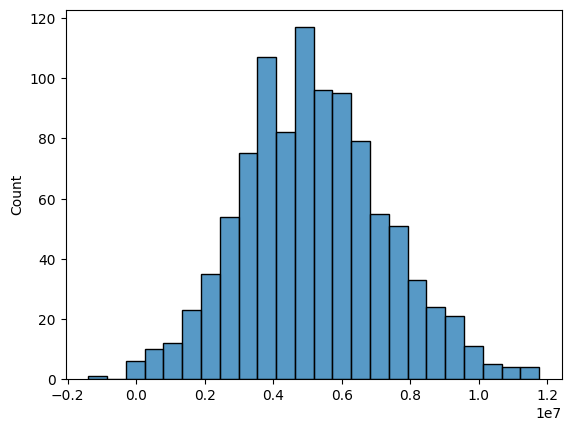

In [31]:
# Bootstrapping para geo_data_1 (antiga)

import seaborn as sns

sample_size = 500
bootstrapping_size = 1000

btprofit = []
for i in range(bootstrapping_size):
    subsample = target_valid1.sample(n=sample_size,replace=True, random_state=state)
    sample_predicts = predicted_valid1.iloc[subsample.index]
    btprofit.append(calculate_profit(subsample,sample_predicts))
    
avg_profit = np.mean(btprofit)
profit_conf_interval = (np.quantile(btprofit,q=0.025),np.quantile(btprofit,q=0.975))
prob_neg_profit = (np.array(btprofit) <0).mean()

sns.histplot(btprofit)
print(f"Probabilidade Lucro Negativo: {prob_neg_profit:.2%}")
print(f"Lucro Médio Esperado: {avg_profit:.2f}")
print(f"Intervalo de confiança: {profit_conf_interval}")

Probabilidade Lucro Negativo: 6.20%
Lucro Médio Esperado: 4201940.05
Intervalo de confiança: (-1158526.0916001017, 9896299.398445744)


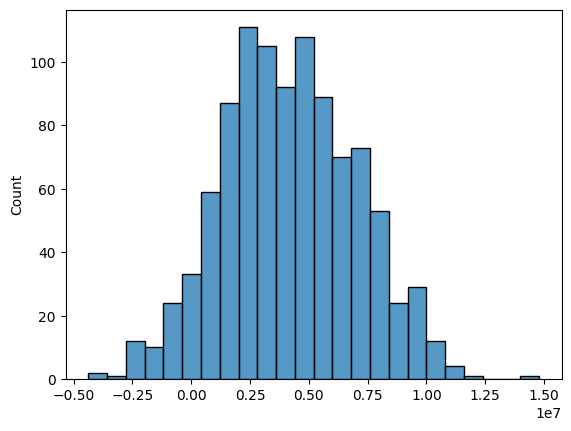

In [32]:
# Bootstrapping para geo_data_2 (antiga)

import seaborn as sns

sample_size = 500
bootstrapping_size = 1000

btprofit = []
for i in range(bootstrapping_size):
    subsample = target_valid2.sample(n=sample_size,replace=True, random_state=state)
    sample_predicts = predicted_valid2.iloc[subsample.index]
    btprofit.append(calculate_profit(subsample,sample_predicts))
    
avg_profit = np.mean(btprofit)
profit_conf_interval = (np.quantile(btprofit,q=0.025),np.quantile(btprofit,q=0.975))
prob_neg_profit = (np.array(btprofit) <0).mean()

sns.histplot(btprofit)
print(f"Probabilidade Lucro Negativo: {prob_neg_profit:.2%}")
print(f"Lucro Médio Esperado: {avg_profit:.2f}")
print(f"Intervalo de confiança: {profit_conf_interval}")

General conclusions:
- Region 1 was recommended for oil well development as it had the highest average profit and the lowest risk of losses (below the 2.5% threshold).
- The results confirmed that Region 1 was consistently profitable and carried minimal risk, aligning with business requirements for sustainable investment.